In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

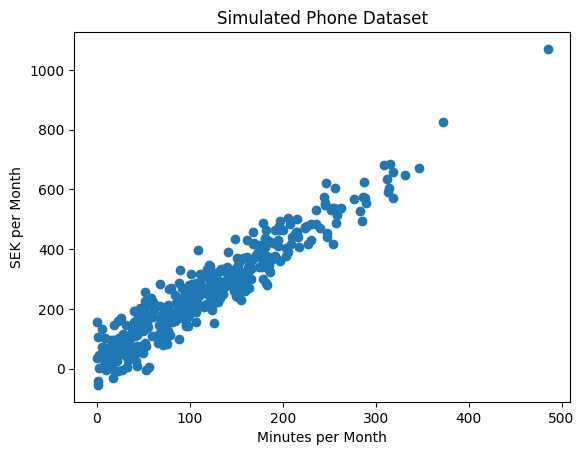

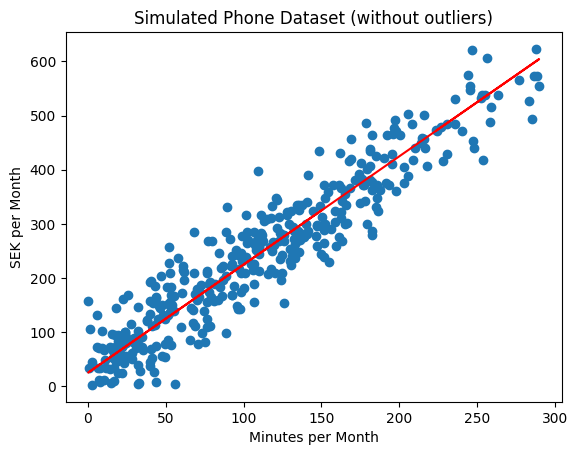

   Minutes per Month  SEK per Month
0         149.671415     244.621448
1          86.173570     167.378389
2         164.768854     354.799893
3         252.302986     531.955001
4          76.584663     155.666051


((381,), (381,))

In [43]:
np.random.seed(42)

# simulate x-values
X = np.abs(np.random.normal(loc=100, scale=100, size=400))

# simulate noise values
noise = np.random.normal(loc=0, scale=50, size=400)

# plot the simulated dataset
y = 2 * X + 25 + noise
plt.scatter(X, y)
plt.title('Simulated Phone Dataset')
plt.xlabel('Minutes per Month')
plt.ylabel('SEK per Month')
plt.show()

# remove outliers
mask = (X <= 300) & (y >= 0)
X = X[mask]
y = y[mask]

# plot the new dataset and ground truth
plt.scatter(X, y)
plt.plot(X, 2 * X + 25, color='red')
plt.title('Simulated Phone Dataset (without outliers)')
plt.xlabel('Minutes per Month')
plt.ylabel('SEK per Month')
plt.show()

# insert values into DataFrame
df = pd.DataFrame({'Minutes per Month': X, 'SEK per Month': y})
print(df.head())
X.shape, y.shape # x.shape = (381,) y.shape = (381,)


In [44]:
def train_test_split(X, y, train_fraction=.7, random_state=42, replace=False):
  
    n_samples = X.shape[0]
    n_train = int(n_samples * train_fraction)
    idx_train = np.random.choice(n_samples, size=n_train, replace=replace)
    idx_test = np.setdiff1d(np.arange(n_samples), idx_train)
    X_train, X_test = X.iloc[idx_train].values, X.iloc[idx_test].values
    y_train, y_test = y.iloc[idx_train].values, y.iloc[idx_test].values
    return X_train, X_test, y_train, y_test

In [45]:
# use train_test_split function to split data
X_train, X_test, y_train, y_test = train_test_split(df['Minutes per Month'], df['SEK per Month'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((266,), (115,), (266,), (115,))

In [46]:
# add column of 1's for beta_0
# np.column_stack((np.ones(266), X_train)) this adds a column of 1's to the left of the array
X_train = np.column_stack((np.ones(len(X_train)), X_train)) 

In [47]:
X_train[:5]

array([[  1.        ,  49.65243459],
       [  1.        , 195.40017635],
       [  1.        ,  78.23187968],
       [  1.        , 134.64482095],
       [  1.        ,  20.74792616]])

In [48]:
# calculate beta_hat using the normal equation
beta_hat = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
beta_hat

array([36.23026836,  1.89288496])

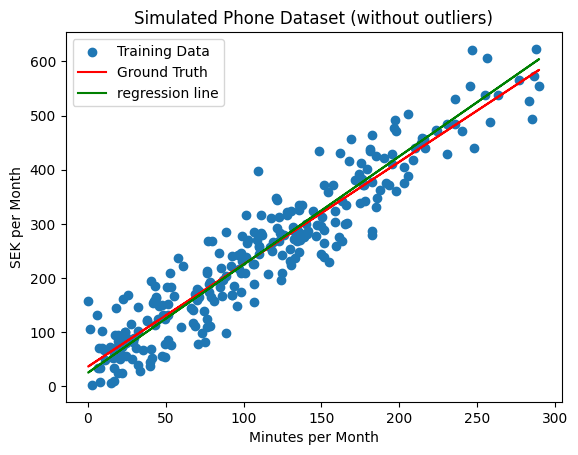

In [58]:
# Plot the the regression line, together with ground truth and training data
# check how this X_train[:, 1] works 
plt.scatter(X_train[:, 1], y_train, label='Training Data')
plt.plot(X_train[:, 1], X_train @ beta_hat, color='red', label='Ground Truth')
plt.plot(X_train[:, 1], 2 * X_train[:, 1] + 25, color='green', label='regression line')
plt.title('Simulated Phone Dataset (without outliers)')
plt.xlabel('Minutes per Month')
plt.ylabel('SEK per Month')
plt.legend();